Bitcoin is a cryptocurrency, a virtual currency designed to act as money and a form of payment outside the control of any one person, group, or entity, and thus removing the need for third-party involvement in financial transactions.

However, there are issues with bitcoins such as hackers breaking into accounts, high volatility of bitcoins, and long transaction delays. Considering the volatility it's always challenging to predict the bitcoin price.

In this discussion, we will deep dive how to predict the bitcoin price using two methods, SARIMAX and LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import plotly.express as px
from itertools import product
import warnings
import statsmodels.api as sm
plt.style.use('seaborn-darkgrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
! unzip '/content/drive/MyDrive/archive.zip'

Archive:  /content/drive/MyDrive/archive.zip
replace coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv  


In [ ]:
import datetime, pytz
#define a conversion function for the native timestamps in the csv file
def dateparse (time_in_secs):    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))


bitstamp= pd.read_csv('/content/coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv', parse_dates=[0], date_parser=dateparse)

We should parse it first and set the date as an index

In [ ]:
bitstamp = bitstamp.set_index('Timestamp')
bitstamp

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2014-12-01 05:33:00+00:00,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
2014-12-01 05:34:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01 05:35:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01 05:36:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01 05:37:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2018-11-10 23:56:00+00:00,6347.41,6347.42,6347.41,6347.42,0.484960,3078.241490,6347.417225
2018-11-10 23:57:00+00:00,6347.41,6347.42,6347.41,6347.42,0.770757,4892.318043,6347.419294
2018-11-10 23:58:00+00:00,6347.41,6347.42,6347.41,6347.42,1.213145,7700.341614,6347.418653


Then we take the resample every day, since our dataset is measured in minutes, we are going to make it into daily dataset by aggregating it using mean measurement

In [ ]:
bitstamp = bitstamp.resample('D').mean()
bitstamp

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2014-12-01 00:00:00+00:00,335.000000,335.000000,335.000000,335.000000,0.014139,4.881387,335.000000
2014-12-02 00:00:00+00:00,377.821429,377.857143,377.821429,377.857143,2.144800,810.724043,377.854911
2014-12-03 00:00:00+00:00,377.818333,377.818333,377.818333,377.818333,0.091101,34.419664,377.818333
2014-12-04 00:00:00+00:00,377.100000,377.100000,377.100000,377.100000,0.010000,3.771000,377.100000
2014-12-05 00:00:00+00:00,377.550000,377.550000,377.550000,377.550000,0.012500,4.720500,377.550000
...,...,...,...,...,...,...,...
2018-11-07 00:00:00+00:00,6506.215896,6506.543979,6505.922681,6506.260521,3.988002,25939.588076,6506.226359
2018-11-08 00:00:00+00:00,6451.058778,6451.349576,6450.686729,6450.996382,3.617201,23308.976039,6451.014558
2018-11-09 00:00:00+00:00,6366.825292,6367.088458,6366.508576,6366.783681,3.131194,19912.815846,6366.780335


Making the data to have non nan values accross all features. We take measure to interpolate the entire nan values, usin interpolate in pandas

In [ ]:
bitstamp = bitstamp.interpolate()

In [ ]:
bitstamp.Weighted_Price.isnull().sum()/len(bitstamp)

0.0

In [ ]:
bitstamp_ = bitstamp.reset_index()
X= bitstamp[['Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
        'Volume_(Currency)']]
y = bitstamp[['Weighted_Price']]

Note that we will use SARIMAX method, meaning that it employs exogenous features to predict the target feature. Here is we separate the exogenous features as X and the target feature as y.
X comprises of Open, High, Low, Close, Volume_(BTC), and Volume_(Currency)

In [ ]:
X

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
Timestamp,,,,,,
2014-12-01 00:00:00+00:00,335.000000,335.000000,335.000000,335.000000,0.014139,4.881387
2014-12-02 00:00:00+00:00,377.821429,377.857143,377.821429,377.857143,2.144800,810.724043
2014-12-03 00:00:00+00:00,377.818333,377.818333,377.818333,377.818333,0.091101,34.419664
2014-12-04 00:00:00+00:00,377.100000,377.100000,377.100000,377.100000,0.010000,3.771000
2014-12-05 00:00:00+00:00,377.550000,377.550000,377.550000,377.550000,0.012500,4.720500
...,...,...,...,...,...,...
2018-11-07 00:00:00+00:00,6506.215896,6506.543979,6505.922681,6506.260521,3.988002,25939.588076
2018-11-08 00:00:00+00:00,6451.058778,6451.349576,6450.686729,6450.996382,3.617201,23308.976039
2018-11-09 00:00:00+00:00,6366.825292,6367.088458,6366.508576,6366.783681,3.131194,19912.815846


y is the target variable and it is only the weighted_price.

In [ ]:
y

,Weighted_Price
Timestamp,
2014-12-01 00:00:00+00:00,335.000000
2014-12-02 00:00:00+00:00,377.854911
2014-12-03 00:00:00+00:00,377.818333
2014-12-04 00:00:00+00:00,377.100000
2014-12-05 00:00:00+00:00,377.550000
...,...
2018-11-07 00:00:00+00:00,6506.226359
2018-11-08 00:00:00+00:00,6451.014558
2018-11-09 00:00:00+00:00,6366.780335


We will divide this dataset into two parts, training and testing dataset, which has to be sequentially arranged, and can not be shuffled.

In [ ]:
train_size=int(len(bitstamp)*0.8)
test_size = len(bitstamp) - train_size

train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

In [ ]:
train_X.shape, train_y.shape

((1153, 6), (1153, 1))

In [ ]:
test_y.shape

(289, 1)

Let's visualize the data

In time series analysis, we don't do the analysis the way we do to other cases. In TSA, there are several parts that we have to concern of. First is trend, that depicts how the plot can go upward and downward, seasonal means there is some reccurence of events maybe yearly, monthly, daily, or so on. We will look closer to that in the graph below:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


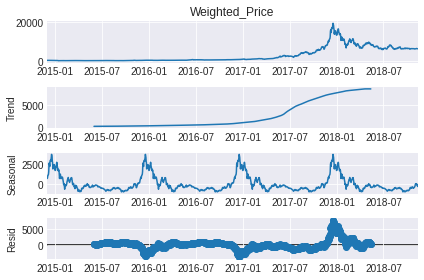

In [ ]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(y['Weighted_Price'],model='add', freq= 365);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

It can be seen that the trend is positive meaning between 2017 until 2018 the trend goes upward or increases over time, although the preceding year it does not have the same increment or stagnant.

The seasonality tells that the graph is repeated yearly , in the early 2015 there is a spike that will be occured in the beginning of 2016, 2017, and 2018

**Check for stationarity **

Stationarity is needed if we go with the TSA using ARIMA model. Stationarity assumption has to be hold true, since ARIMA works that way. There are many ways to prove the stationarity, one of those is using the ADF or Augmented Dickey Fuller Test, some may prefer using rolling window and moving average to check whether the statistical properties do not change over time.

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

In [ ]:
# y_test=y[:train_size].dropna()
test_adf(train_y, 'Stock Price')

Strong evidence for  Null Hypothesis
Accept Null Hypothesis - Data is not Stationary
Data is NOT Stationary for Stock Price


Our test using ADF test fails to prove that our target variableis stationary. It is understandable since our model goes up in some time-steps, meaning that the statistical properties change over time. If it is the case then we could go for the alternative way which is we can difference it and re-examine it using ADF test

In [ ]:
test_adf(train_y.diff() ,'Stock Price')

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary Stock Price


Our test succeeds to reject the null hypothesis, it can be assumed that our target variable is stationary using the first difference. It can be a hint later, that our model's parameter of difference is order 1

Next on, we should use ACF and PACF plot to understand better the our other model's parameter.

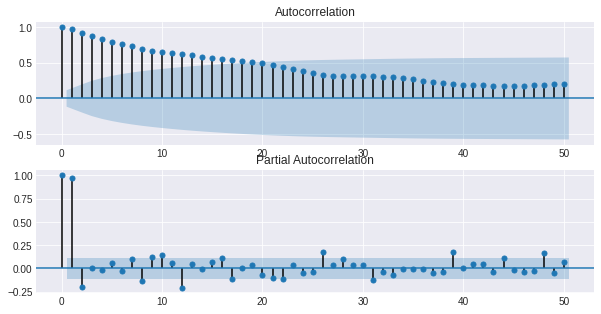

In [ ]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(test_y, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(test_y, lags=50, ax=ax[1])
plt.show()

Our plots in ACF and PACF plots have hint that our model has PACF lags in 2nd lags, it can be concluded that our parameter in auto regressive is 2. 

**SARIMAX Modelling**

SARIMAX will take into account the seasonality, auto regressive, moving average terms, and the exogenous factors, to predict the target variables.
As we know that our parameter of p is 2 then we set it to 2. our d is one since it can reach the stationarity if we take difference by 1.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_y, 
exog=train_X,
 order=(2,1,0),
 seasonal = True,
 enforce_invertibility=False, enforce_stationarity=False)
results = model.fit()
predictions= results.predict(start =train_y.shape[0], end=train_y.shape[0]+1+test_y.shape[0]-2, exog = test_X)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
predictions= pd.DataFrame(predictions)

In [ ]:
predictions

,predicted_mean
2018-01-27 00:00:00+00:00,11177.144675
2018-01-28 00:00:00+00:00,11426.223388
2018-01-29 00:00:00+00:00,11137.289871
2018-01-30 00:00:00+00:00,10620.479517
2018-01-31 00:00:00+00:00,9978.638994
...,...
2018-11-07 00:00:00+00:00,6506.061884
2018-11-08 00:00:00+00:00,6450.844766
2018-11-09 00:00:00+00:00,6366.621329
2018-11-10 00:00:00+00:00,6355.491071


<Figure size 1080x576 with 0 Axes>

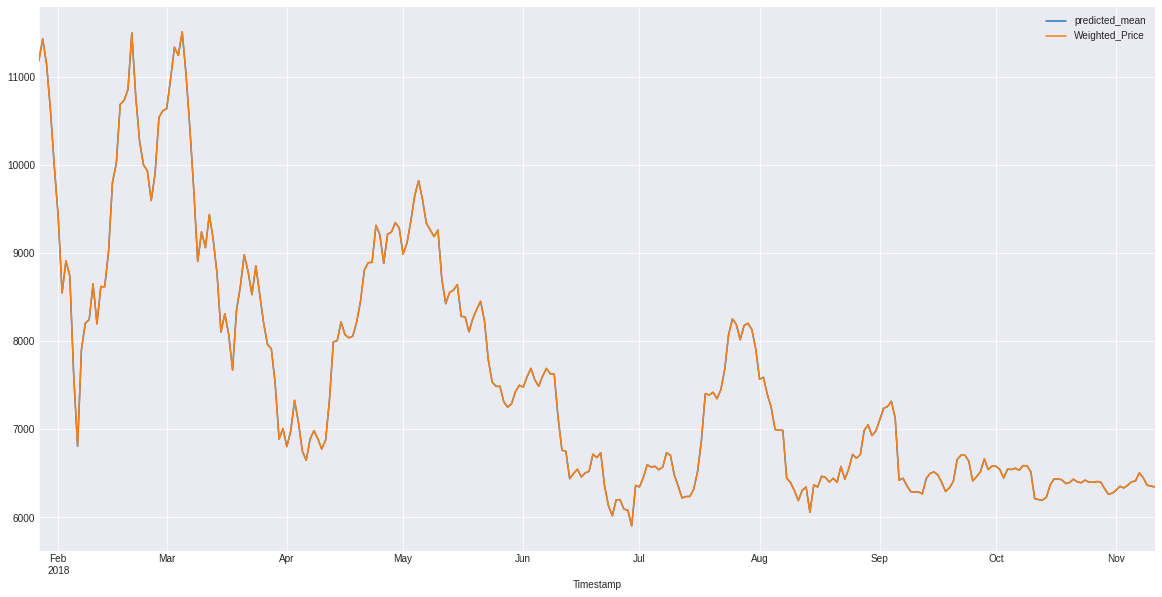

In [ ]:
plt.figure(figsize = (15,8))
predictions.plot(legend = 'Prediction',figsize = (20,10))
test_y.Weighted_Price.plot(legend = 'Y')

From the plot above, we can conclude that our model can predict pretty well thanks to SARIMAX model that takes into account the exogenous features. It is almost the same plot between the two

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(predictions.predicted_mean, test_y.Weighted_Price)))

RMSE of Auto ARIMAX: 0.15306197305670963


It has very few RMSE that only 0.15 USD. Our SARIMAX model has been doing pretty good job in predicting the bitcoin prices

Next we move to the Deep Learning approach
In this section it is rather different but the overall process is actually the same. 
We use the tensorflow API to help our machine learns the data using deep learning (LSTM).
LSTM is best suited for data which has sequence like timestamp.

In [ ]:
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
n_train_time = train_X.shape[0]
# n_train_time = 1000


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout


df_daily = bitstamp

In [ ]:
df_daily = df_daily.interpolate()
df_daily.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In deep learning, we must scale our data in order to let the machine learn. Otherwise, the activation function will stop working and the machine stops learning, and the loss value can not be minimised.

After scalling, we should split our data into training and testing dataset as we did previously.

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
df_scaled= scaler.fit_transform(df_daily)
train = df_scaled[:n_train_time, :]
test = df_scaled[n_train_time:, :]
x_train, y_train = train, train[:,-1]
x_test, y_test = test, test[:,-1]


We create the timeseries generator to make our DL algorithms easier to use

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
win_length = 1
batch_size = 32
num_features = 7
train_generator = TimeseriesGenerator(x_train, y_train,length = win_length)
test_generator = TimeseriesGenerator(x_test, y_test, length = win_length)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience =20,
                                                mode = 'min')


We create the Deep Learning with LSTM as the base model

In [ ]:
# Initialising the LSTM
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (win_length, 7)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mean_squared_error'])

regressor.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 1, 50)             11600     
                                                                 
 dropout_26 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_27 (LSTM)              (None, 1, 50)             20200     
                                                                 
 dropout_27 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_28 (LSTM)              (None, 1, 50)             20200     
                                                                 
 dropout_28 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_29 (LSTM)              (None, 50)               

We then fit the model and start training and rescale back to the origin, and have a look at how good our DL algorithm can predict the bitcoin prices

Epoch 1/100
9/9 [==============================] - 7s 185ms/step - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.1308 - val_mean_squared_error: 0.1308
Epoch 2/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.1197 - val_mean_squared_error: 0.1197
Epoch 3/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1098 - val_mean_squared_error: 0.1098
Epoch 4/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.1014 - val_mean_squared_error: 0.1014
Epoch 5/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0944 - val_mean_squared_error: 0.0944
Epoch 6/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0886 - val_mean_squared_error: 0.0886
Epoch 7/100
9/9 [======================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


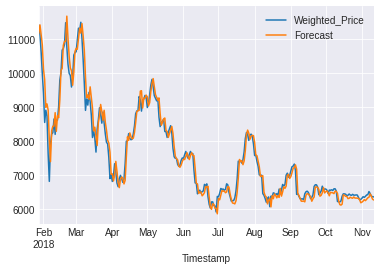

In [ ]:
# Fitting the RNN to the Training set
history = regressor.fit(train_generator, validation_data=test_generator, epochs = 100, verbose=1, shuffle=False)

train_predict = regressor.predict(train_generator)
test_predict = regressor.predict(test_generator)
# y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
# y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
df_train_final = pd.concat([pd.DataFrame(x_train[:,:-1][win_length:]),pd.DataFrame(train_predict)], axis = 1)
df_test_final = pd.concat([pd.DataFrame(x_test[:,:-1][win_length:]),pd.DataFrame(test_predict),], axis = 1)
inv_train= scaler.inverse_transform(df_train_final)
inv_test = scaler.inverse_transform(df_test_final)
inv_y_train = inv_train[:,-1]
inv_y_test = inv_test[:,-1]
df_final = df_daily[inv_y_test.shape[0]*-1:] #slicing
df_final['Forecast'] = inv_y_test

#

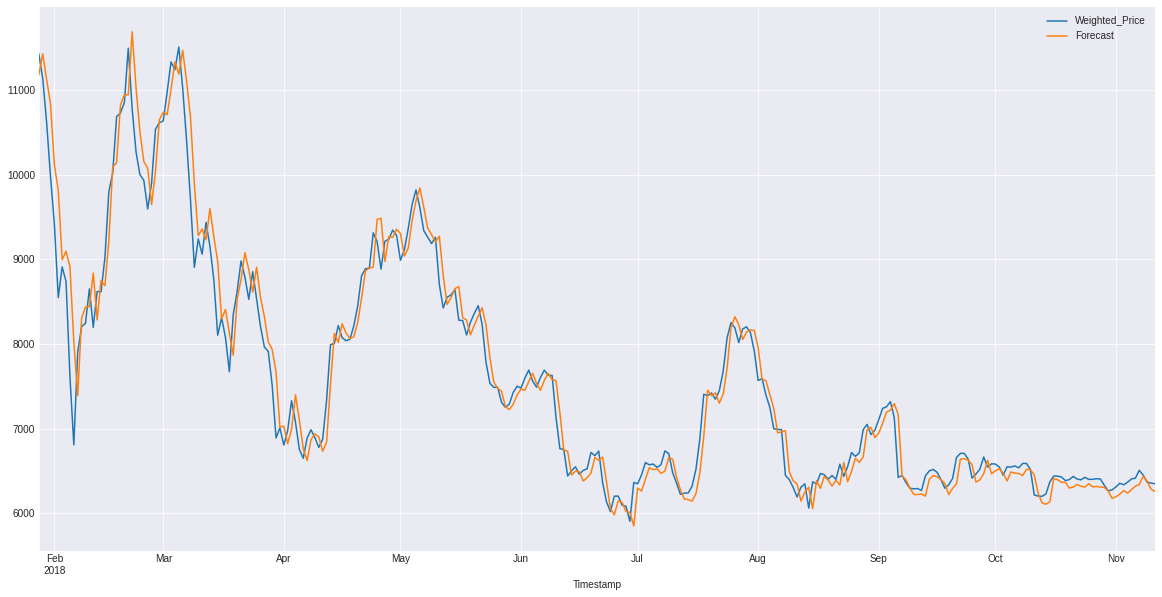

In [ ]:
df_final.Weighted_Price.plot(legend = True, figsize = (20,10))
df_final.Forecast.plot(legend = True)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_final['Weighted_Price'],df_final['Forecast'])))

RMSE of Auto ARIMAX: 296.0244716202883


Deep Learning approach gives the error much bigger than those of SARIMAX that is nearly over 300 USD. It is not good 